Global Power Plant Database Project

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# importing all necessary libraries

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [9]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

In [10]:
df.shape

(908, 13)

In [11]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
commissioning_year,73
source,191


In [12]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

In [13]:
print(df.shape)
df.head()

(908, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [14]:
df.isna().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         908 non-null    float64
 1   latitude            862 non-null    float64
 2   longitude           862 non-null    float64
 3   primary_fuel        908 non-null    object 
 4   commissioning_year  528 non-null    float64
 5   source              908 non-null    object 
 6   geolocation_source  889 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.8+ KB


In [16]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


In [17]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [18]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

In [19]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  520
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Reliance Power Ltd                                               4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Ujaas Energy Limited                                             3
Solairedirect                                                    3
Shri Ssk ltd           

Visualization

In [20]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

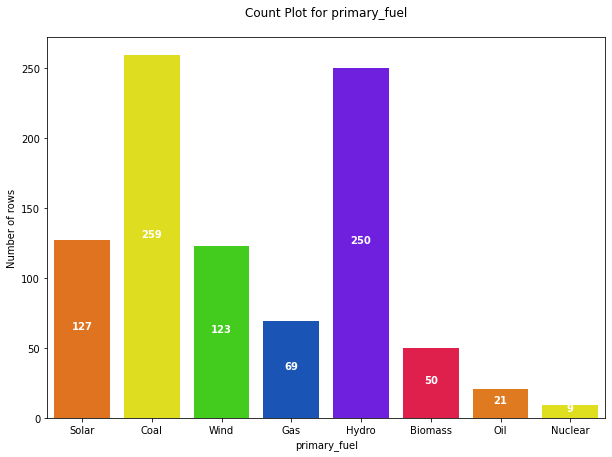

In [21]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

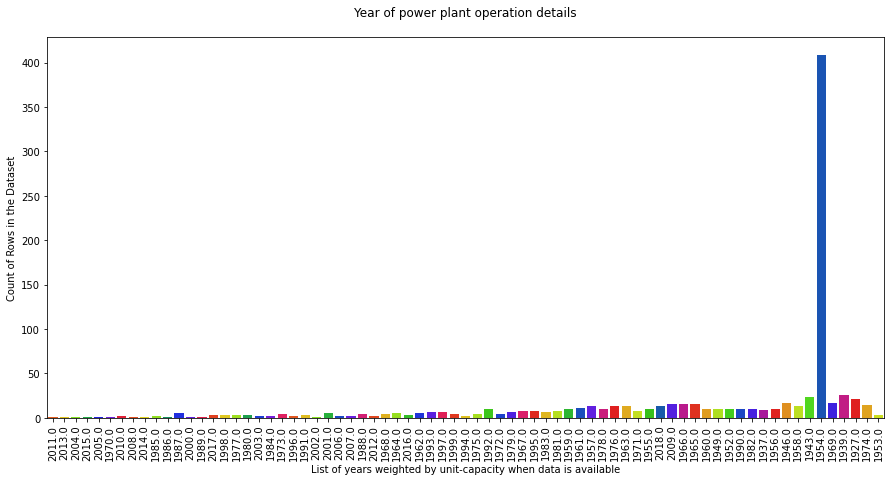

In [23]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

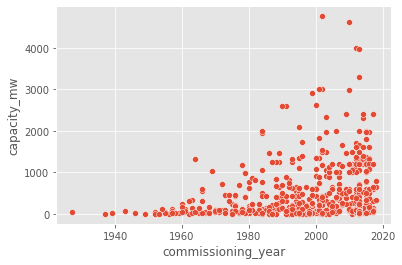

In [24]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

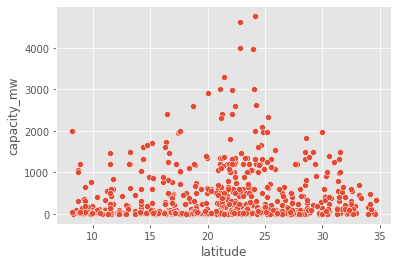

In [26]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

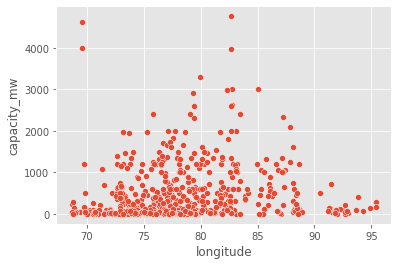

In [27]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

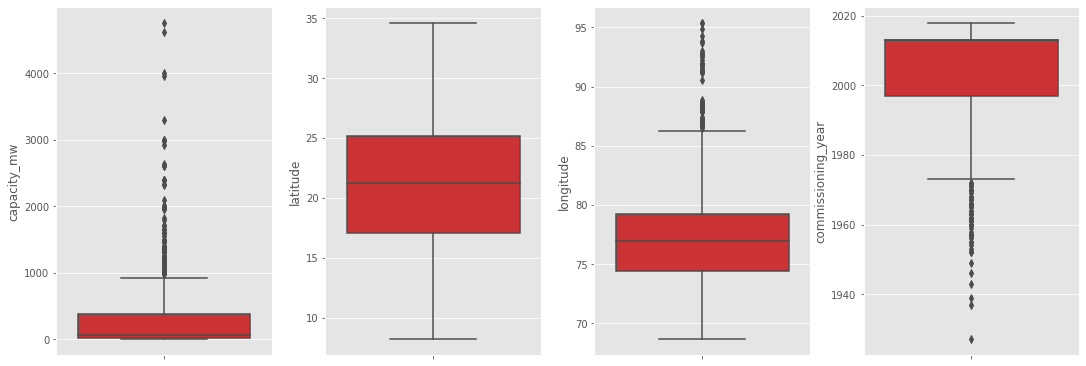

In [30]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

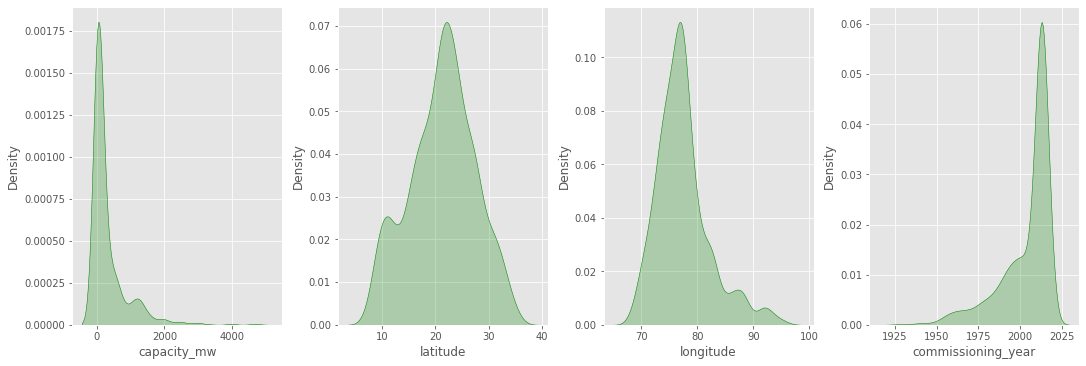

In [31]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

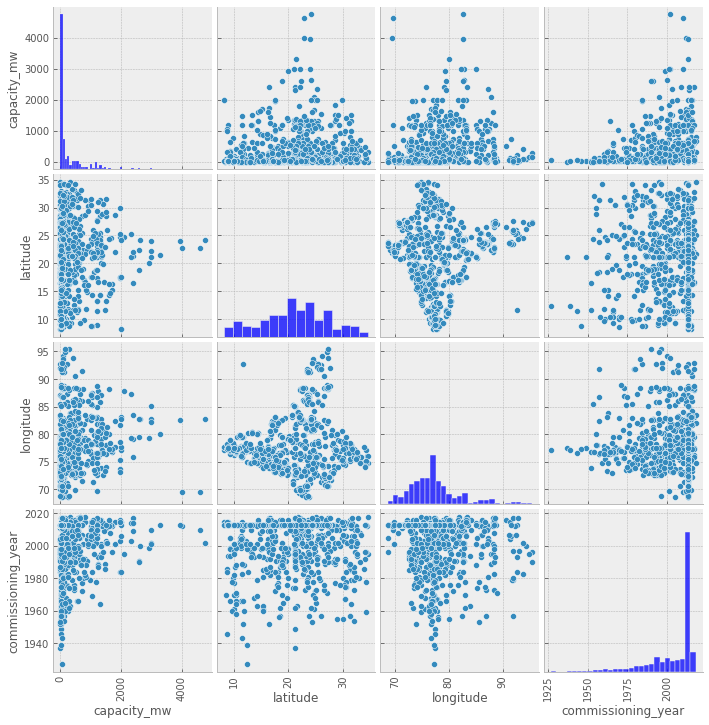

In [32]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

Encoding all the object datatype columns

In [33]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


In [34]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


Correlation using a Heatmap

Positive correlation

Negative correlation

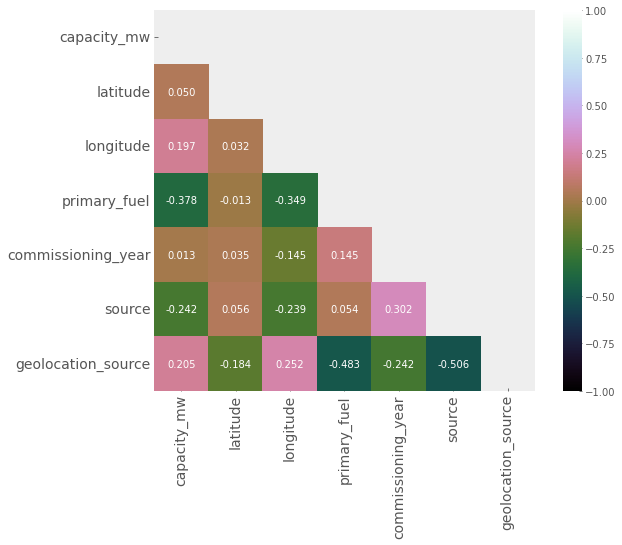

In [35]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


Correlation Bar Plot comparing features with our labels

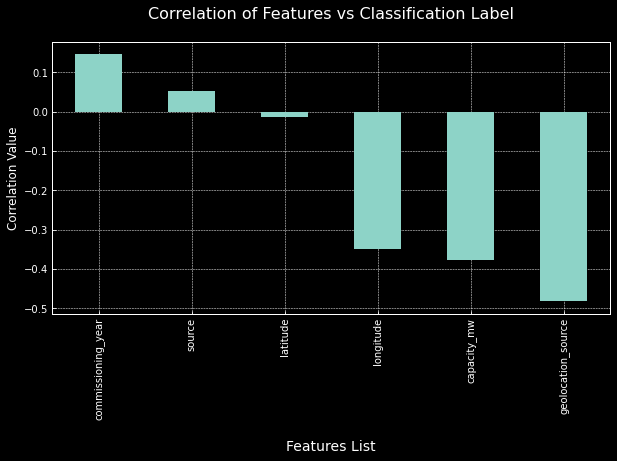

In [ ]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

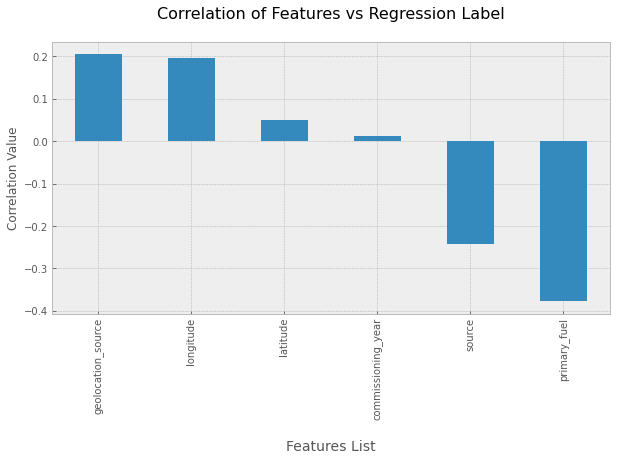

In [36]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Using Z Score to remove outliers

In [37]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 7)
Shape of the dataframe after removing outliers:  (839, 7)
Percentage of data loss post outlier removal:  7.599118942731277


In [38]:
df.skew()

capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -1.578180
source                1.794155
geolocation_source   -2.114267
dtype: float64

Using Log Transform to fix skewness

In [39]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [41]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

Resolving the class imbalance issue in our label column

In [42]:
Y.value_counts()

1    237
3    219
7    123
6    121
2     64
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

In [45]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

Feature Scaling

Finding best random state for building Classification Models

In [48]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 43.037974683544306 on Random State 208


Machine Learning Model for Classification with Evaluation Metrics

In [49]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [50]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.72      0.67        60
           1       0.36      0.09      0.14        55
           2       0.00      0.00      0.00        44
           3       0.29      0.56      0.38        71
           4       0.50      0.35      0.41        72
           5       0.00      0.00      0.00        60
           6       0.83      0.75      0.79        59
           7       0.27      0.68      0.39        53

    accuracy                           0.41       474
   macro avg       0.36      0.39      0.35       474
weighted avg       0.37      0.41      0.36       474

Accuracy Score: 40.71729957805908
Cross Validation Score: 37.18316900430496

Accuracy Score - Cross Validation Score is 3.534130573754119


In [51]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        60
           1       0.60      0.47      0.53        55
           2       0.44      0.57      0.50        44
           3       0.82      0.70      0.76        71
           4       0.74      0.78      0.76        72
           5       0.70      0.82      0.75        60
           6       0.96      0.92      0.94        59
           7       0.98      1.00      0.99        53

    accuracy                           0.77       474
   macro avg       0.77      0.76      0.76       474
weighted avg       0.78      0.77      0.77       474

Accuracy Score: 76.79324894514767
Cross Validation Score: 75.5790862380225

Accuracy Score - Cross Validation Score is 1.214162707125169


In [52]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.70      0.60      0.65        55
           2       0.53      0.75      0.62        44
           3       0.81      0.65      0.72        71
           4       0.86      0.92      0.89        72
           5       0.91      0.85      0.88        60
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00        53

    accuracy                           0.85       474
   macro avg       0.85      0.85      0.84       474
weighted avg       0.85      0.85      0.85       474

Accuracy Score: 84.59915611814345
Cross Validation Score: 84.80974864602139

Accuracy Score - Cross Validation Score is -0.21059252787793525


In [53]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.83      0.64      0.72        55
           2       0.74      0.89      0.80        44
           3       0.93      0.87      0.90        71
           4       0.88      0.96      0.92        72
           5       0.98      0.93      0.96        60
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99        53

    accuracy                           0.91       474
   macro avg       0.91      0.91      0.91       474
weighted avg       0.92      0.91      0.91       474

Accuracy Score: 91.35021097046413
Cross Validation Score: 89.97889182058047

Accuracy Score - Cross Validation Score is 1.3713191498836608


In [54]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        60
           1       0.48      0.22      0.30        55
           2       0.35      0.57      0.43        44
           3       0.76      0.62      0.68        71
           4       0.69      0.67      0.68        72
           5       0.67      0.70      0.68        60
           6       0.79      0.83      0.81        59
           7       0.88      1.00      0.94        53

    accuracy                           0.67       474
   macro avg       0.67      0.67      0.66       474
weighted avg       0.68      0.67      0.67       474

Accuracy Score: 67.29957805907173
Cross Validation Score: 66.93042632967644

Accuracy Score - Cross Validation Score is 0.3691517293952984


In [55]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.83      0.64      0.72        55
           2       0.80      0.89      0.84        44
           3       0.94      0.85      0.89        71
           4       0.89      1.00      0.94        72
           5       0.97      0.97      0.97        60
           6       1.00      1.00      1.00        59
           7       0.96      1.00      0.98        53

    accuracy                           0.92       474
   macro avg       0.92      0.92      0.91       474
weighted avg       0.92      0.92      0.92       474

Accuracy Score: 91.9831223628692
Cross Validation Score: 91.45549229273712

Accuracy Score - Cross Validation Score is 0.5276300701320764


Hyper parameter tuning on the best Classification ML Model

In [56]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

In [57]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [58]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [59]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 2,
 'n_jobs': 2,
 'random_state': 45}

In [60]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=4, n_jobs=2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 88.81856540084388


AUC ROC Curve for multi class label

In [61]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.992342 (macro),
0.992002 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.991818 (macro),
0.991629 (weighted by prevalence)


Confusion Matrix

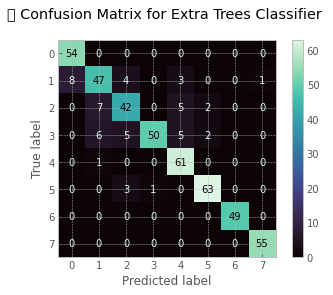

In [62]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

Saving the best Classification ML model

In [63]:
filename = "FinalModel_Classification_GP01.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Classification_GP01.pkl']

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and regression label

In [64]:
X = df.drop('capacity_mw', axis=1)
Y = df['capacity_mw']

Feature Scaling

In [65]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.154079,-0.911736,1.175163,0.468797,1.580000,-1.060641
1,0.598056,-0.567417,-0.983247,0.618009,3.127148,0.400570
2,0.132345,-1.920402,1.606845,0.618009,-0.514600,0.400570
3,0.452429,3.205575,-0.551565,-0.053442,-0.490798,0.400570
4,0.141538,1.283666,-0.983247,0.767220,-0.490798,0.400570


Finding the best random state for building Regression Models

In [66]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.538334072004571 on Random State 135


In [67]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=135)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [68]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.2755006251261407
R2 Score is: 53.833407200457096
Cross Validation Score: 42.23177089747712
R2 Score - Cross Validation Score is 11.601636302979976


In [69]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 1.275499938378957
R2 Score is: 53.83345691390831
Cross Validation Score: 42.258044119383506
R2 Score - Cross Validation Score is 11.575412794524802


In [70]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 1.4028822860149066
R2 Score is: 44.15183151646706
Cross Validation Score: 37.52199723471622
R2 Score - Cross Validation Score is 6.6298342817508455


In [71]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1.1644556142667202
R2 Score is: 61.52201239071952
Cross Validation Score: 47.635622859038364
R2 Score - Cross Validation Score is 13.886389531681154


In [72]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1.2326681776519275
R2 Score is: 56.88197687274358
Cross Validation Score: 44.62508078662979
R2 Score - Cross Validation Score is 12.256896086113791


In [73]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1.2422117463282696
R2 Score is: 56.211735229162606
Cross Validation Score: 46.632487564945244
R2 Score - Cross Validation Score is 9.579247664217363


In [74]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.5731763885028236
R2 Score is: 29.770219458629764
Cross Validation Score: 4.158786483307106
R2 Score - Cross Validation Score is 25.611432975322657


In [75]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.1131522779037217
R2 Score is: 64.83783310530653
Cross Validation Score: 55.637601015967334
R2 Score - Cross Validation Score is 9.200232089339195


In [76]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.0155902642748653
R2 Score is: 70.73129346883269
Cross Validation Score: 63.48023663442379
R2 Score - Cross Validation Score is 7.2510568344088995


In [77]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

[19:00:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Score is: 0.9836149659016845
R2 Score is: 72.54529837464186
[19:00:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation Score: 62.172711177696115
R2 Score - Cross Validation Score is 10.372587196945744


Hyper parameter tuning on the best Regression ML Model

In [78]:
# Choosing Extra Trees Regressor

fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [79]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [80]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=None,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             par

In [81]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 3,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 42}

In [82]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.97950263565522


Saving the best Regression ML model

In [83]:
filename = "FinalModel_Regression_GP02.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Regression_GP02.pkl']